In [27]:
import pickle
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.preprocessing
import sklearn.metrics
import torchvision
import torchvision.transforms as transforms

In [28]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [29]:
X_pandas = pd.DataFrame()
y_pandas = pd.DataFrame()
for i in range(1,6,1):
    dataset_data = unpickle('cifar-10-batches-py/data_batch_%d'%i)
    y = dataset_data[b'labels']
    X = dataset_data[b'data']
    X_pandas = X_pandas.append(pd.DataFrame(X))
    y_pandas = y_pandas.append(pd.DataFrame(y))

In [30]:
X_pandas.head()

0     1     2     3     4     5     6     7     8     9     ...  3062  \
0    59    43    50    68    98   119   139   145   149   149  ...    59   
1   154   126   105   102   125   155   172   180   142   111  ...    22   
2   255   253   253   253   253   253   253   253   253   253  ...    78   
3    28    37    38    42    44    40    40    24    32    43  ...    53   
4   170   168   177   183   181   177   181   184   189   189  ...    92   

   3063  3064  3065  3066  3067  3068  3069  3070  3071  
0    58    65    59    46    57   104   140    84    72  
1    42    67   101   122   133   136   139   142   144  
2    83    80    69    66    72    79    83    83    84  
3    39    59    42    44    48    38    28    37    46  
4    88    85    82    83    79    78    82    78    80  

[5 rows x 3072 columns]

In [31]:
y_pandas.head()

0
0  6
1  9
2  9
3  4
4  1

In [32]:
X_train = X_pandas.to_numpy()
y_train = y_pandas.to_numpy()
print(X_train.shape,y_train.shape)
print("X:", X_train.shape, X_train.dtype)
y_train = y_train.reshape(1,-1).squeeze()
print(y_train)
print("y:", y_train.shape, y_train.dtype)
# y_train = np.zeros((X_train.shape[0], 10))
# for index, i in enumerate(y):
#     y_train[index, i[0]] = 1

(50000, 3072) (50000, 1)
X: (50000, 3072) uint8
[6 9 9 ... 9 1 1]
y: (50000,) int64


In [33]:
dataset_data = unpickle('cifar-10-batches-py/test_batch')
y_test = np.array(dataset_data[b'labels'])
X_test = np.array(dataset_data[b'data'])
print(y_test)
print("X:", X_test.shape, X_test.dtype)
print("y:", y_test.shape, y_test.dtype)

[3 8 8 ... 5 1 7]
X: (10000, 3072) uint8
y: (10000,) int32


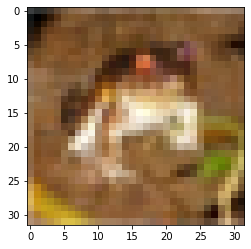

In [34]:
#See first image plot
plt.imshow(X_train[0].reshape(3,32,32).transpose(1,2,0))

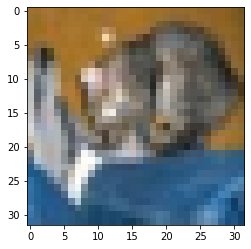

In [35]:
plt.imshow(X_test[0].reshape(3,32,32).transpose(1,2,0))

In [36]:
# scaler = sklearn.preprocessing.StandardScaler()
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.fit(X_test).transform(X_test)

In [37]:
X_train = torch.tensor(X_train.reshape(-1, 3, 32, 32) / 255, dtype=torch.float)
y_train = torch.LongTensor(y_train)

In [38]:
dataset_data = unpickle('cifar-10-batches-py/test_batch')
y_test = torch.tensor(y_test, dtype=torch.float)
X_test = np.interp(X_test, (0, 255), (-1, 1))
X_test = torch.tensor(X_test.reshape(-1, 3, 32, 32), dtype=torch.float)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

torch.Size([50000, 3, 32, 32]) torch.Size([50000])
torch.Size([10000, 3, 32, 32]) torch.Size([10000])


In [39]:
# transform = transforms.Compose(
#     [transforms.ToTensor(),
#      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
#                                         download=True, transform=transform)
# trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
#                                           shuffle=True, num_workers=2)

# testset = torchvision.datasets.CIFAR10(root='./data', train=False,
#                                        download=True, transform=transform)
# testloader = torch.utils.data.DataLoader(testset, batch_size=4,
#                                          shuffle=False, num_workers=2)

# classes = ('plane', 'car', 'bird', 'cat',
#            'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [40]:
#CNN
torch.manual_seed(0)


model = torch.nn.Sequential(
    # Here size of the tensor is 3,32,32
    torch.nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, padding=0, stride=1),
    # Here size of the tensor is 6,30,30
    torch.nn.ReLU(),
    # Here size of the tensor is 6,30,30
    torch.nn.MaxPool2d(kernel_size=2, stride=2),
    # Here size of the tensor is 6,15,15
    torch.nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, padding=0, stride=1),
    # Here size of the tensor is 16,13,13
    torch.nn.ReLU(),
    # Here size of the tensor is 16,13,13
    torch.nn.Flatten(),
    torch.nn.Linear(16*10*10, 120),    
    torch.nn.Linear(120, 84),
    torch.nn.ReLU(),
    torch.nn.Linear(84, 10),
)

# model = torch.nn.Sequential(
#     torch.nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=0, stride=1),
#     torch.nn.ReLU(),
#     torch.nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=0, stride=1),
#     torch.nn.ReLU(),
#     torch.nn.MaxPool2d(2,2),
#     torch.nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
#     torch.nn.ReLU(),
#     torch.nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3),
#     torch.nn.ReLU(),
#     torch.nn.MaxPool2d(2,2),
#     torch.nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3),
#     torch.nn.ReLU(),
#     torch.nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3),
#     torch.nn.ReLU(),

#     torch.nn.Flatten(),
#     torch.nn.Linear(128, 100),    
#     torch.nn.Linear(1*10*10, 84),
#     torch.nn.ReLU(),
#     torch.nn.Linear(84, 10),
# )

In [41]:
# y_pred = model(X_train)
# assert y_pred.shape == (5, 10)

In [42]:
# y_pred = torch.softmax(model(X_train[:5]), dim=1)
# print(y_pred)

In [43]:
# W1, b1, *_ = [x for x in model.parameters()]
# W1 = parameters[0]
# W1 = W1.detach().numpy()
# W1 = W1 / 2 + 0.5
# print(W1, W1.shape)
# W1 = W1[5].transpose(1,2,0)
# print(W1.shape)
# plt.imshow(W1)

In [44]:
batch_size = 200
num_epoch = 100

# Your code to define loss function and optimizer here. Aim for 2 lines.
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
# print(y_train.shape, y_train)

In [ ]:
for epoch in range(1, num_epoch+1):
    for i in range(0, len(X_train), batch_size):        
        X = X_train[i:i+batch_size]
        y = y_train[i:i+batch_size]
    
        optimizer.zero_grad()
        y_pred = model(X)
        l = loss(y_pred, y)
#         model.zero_grad()
        l.backward()
        optimizer.step()
    print("Epoch %d final minibatch had loss %.4f" % (epoch, l.item()))


# for epoch in range(2):  # loop over the dataset multiple times

#     running_loss = 0.0
#     for i, data in enumerate(trainloader, 0):
#         # get the inputs
#         inputs, labels = data

#         # zero the parameter gradients
#         optimizer.zero_grad()

#         # forward + backward + optimize
#         outputs = model(inputs)
#         l = loss(outputs, labels)
#         l.backward()
#         optimizer.step()

#         # print statistics
#         running_loss += l.item()
#         if i % 2000 == 1999:    # print every 2000 mini-batches
#             print('[%d, %5d] loss: %.3f' %
#                   (epoch + 1, i + 1, running_loss / 2000))
#             running_loss = 0.0

# print('Finished Training')


Epoch 1 final minibatch had loss 2.3075
Epoch 2 final minibatch had loss 2.3036
Epoch 3 final minibatch had loss 2.2973
Epoch 4 final minibatch had loss 2.2696
Epoch 5 final minibatch had loss 2.0865
Epoch 6 final minibatch had loss 2.0472
Epoch 7 final minibatch had loss 2.0012
Epoch 8 final minibatch had loss 1.9617
Epoch 9 final minibatch had loss 1.9226
Epoch 10 final minibatch had loss 1.8907
Epoch 11 final minibatch had loss 1.8657
Epoch 12 final minibatch had loss 1.8383
Epoch 13 final minibatch had loss 1.7667
Epoch 14 final minibatch had loss 1.7027
Epoch 15 final minibatch had loss 1.6496
Epoch 16 final minibatch had loss 1.6068
Epoch 17 final minibatch had loss 1.5714
Epoch 18 final minibatch had loss 1.5407
Epoch 19 final minibatch had loss 1.5093
Epoch 20 final minibatch had loss 1.4823
Epoch 21 final minibatch had loss 1.4546
Epoch 22 final minibatch had loss 1.4277
Epoch 23 final minibatch had loss 1.4079
Epoch 24 final minibatch had loss 1.3892
Epoch 25 final minibatch 

In [ ]:
print(X_test[0].shape)
a = X_test[0]
b = a.detach().numpy()

In [ ]:
plt.imshow(b.transpose(1,2,0))

In [ ]:
y_predict = model(X_train[0:1000, :])
a = y_predict.detach().numpy()
a = np.argmax(a, axis=1)
a_y_train = y_train.detach().numpy()
accuracy = sklearn.metrics.accuracy_score(a_y_train[0:1000], a)
print(accuracy)
# print(y_predict, y_train)


y_predict = model(X_test)
a = y_predict.detach().numpy()
a = np.argmax(a, axis=1)
soft_y_train = y_test.detach().numpy()
accuracy = sklearn.metrics.accuracy_score(soft_y_train, a)
print(accuracy)
# print(y_predict, soft_y_train)

In [ ]:
# plt.imshow(X_train[0].reshape(3,32,32).transpose(1,2,0))
a = X_test[0]
b = a.detach().numpy()

In [ ]:
plt.imshow(b.transpose(1,2,0))

In [ ]:
x = X_train[0]
print(x.shape)

In [ ]:
def f(x):
    return -(x - 3)**2

In [ ]:
for i in range(10):
    # Evaluate our function transforming x into some quantity y that we want to maximize
    y = f(x)
    # Backpropagate a gradient of y with respect to x; this fills the x.grad variable
    y.backward()
    # Move x a small step in a direction that would increase y
    x.data += 0.2*x.grad.data
    # Reset the gradient for the next iteration, since backward() always adds to the current grad value.
    x.grad.data.zero_()
    print("%.3f" % x)